# Data Analysis

In [2]:
# import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import warnings

In [3]:
# it is used to remove the warnings from the output
warnings.filterwarnings("ignore")

In [4]:
# It is used to read the CSV 
df=pd.read_csv("stocks.csv")

## Understanding the Data

In [6]:
# It is used to print the dataset
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [7]:
# The head command is used to print the first 5 rows of the dataset
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [8]:
# The tail command is used to print the last 5 rows of the dataset
df.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [9]:
# describe the statistical information of the numerical columns
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [10]:
# it is the same as the describe command, just the difference being that it also includes the categorical columns
df.describe(include="all")

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
unique,4,62,NaN,NaN,NaN,NaN,NaN,NaN
top,AAPL,2023-02-07,NaN,NaN,NaN,NaN,NaN,NaN
freq,62,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,NaN,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,NaN,NaN,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,NaN,NaN,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,NaN,NaN,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,NaN,NaN,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07


In [11]:
# The info command is used to tell the null values and the datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [12]:
# It tells the rows and columns of the dataset
df.shape

(248, 8)

In [13]:
# This will tell the total number of null values present in each column
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Preprocessing

In [15]:
# This will change the datatype of the column 'Date' from 'object' to 'datetime'
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Feature Engineering: Adding Moving Averages & Volatility
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Volatility'] = df['Close'].pct_change().rolling(window=7).std()
df.dropna(inplace=True)  # Drop rows with NaN values due to rolling calculations

In [17]:
# This will check the null values after calculating the rolling value 
df.isnull().sum()

Ticker        0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
MA_7          0
MA_30         0
Volatility    0
dtype: int64

# Data Visualization

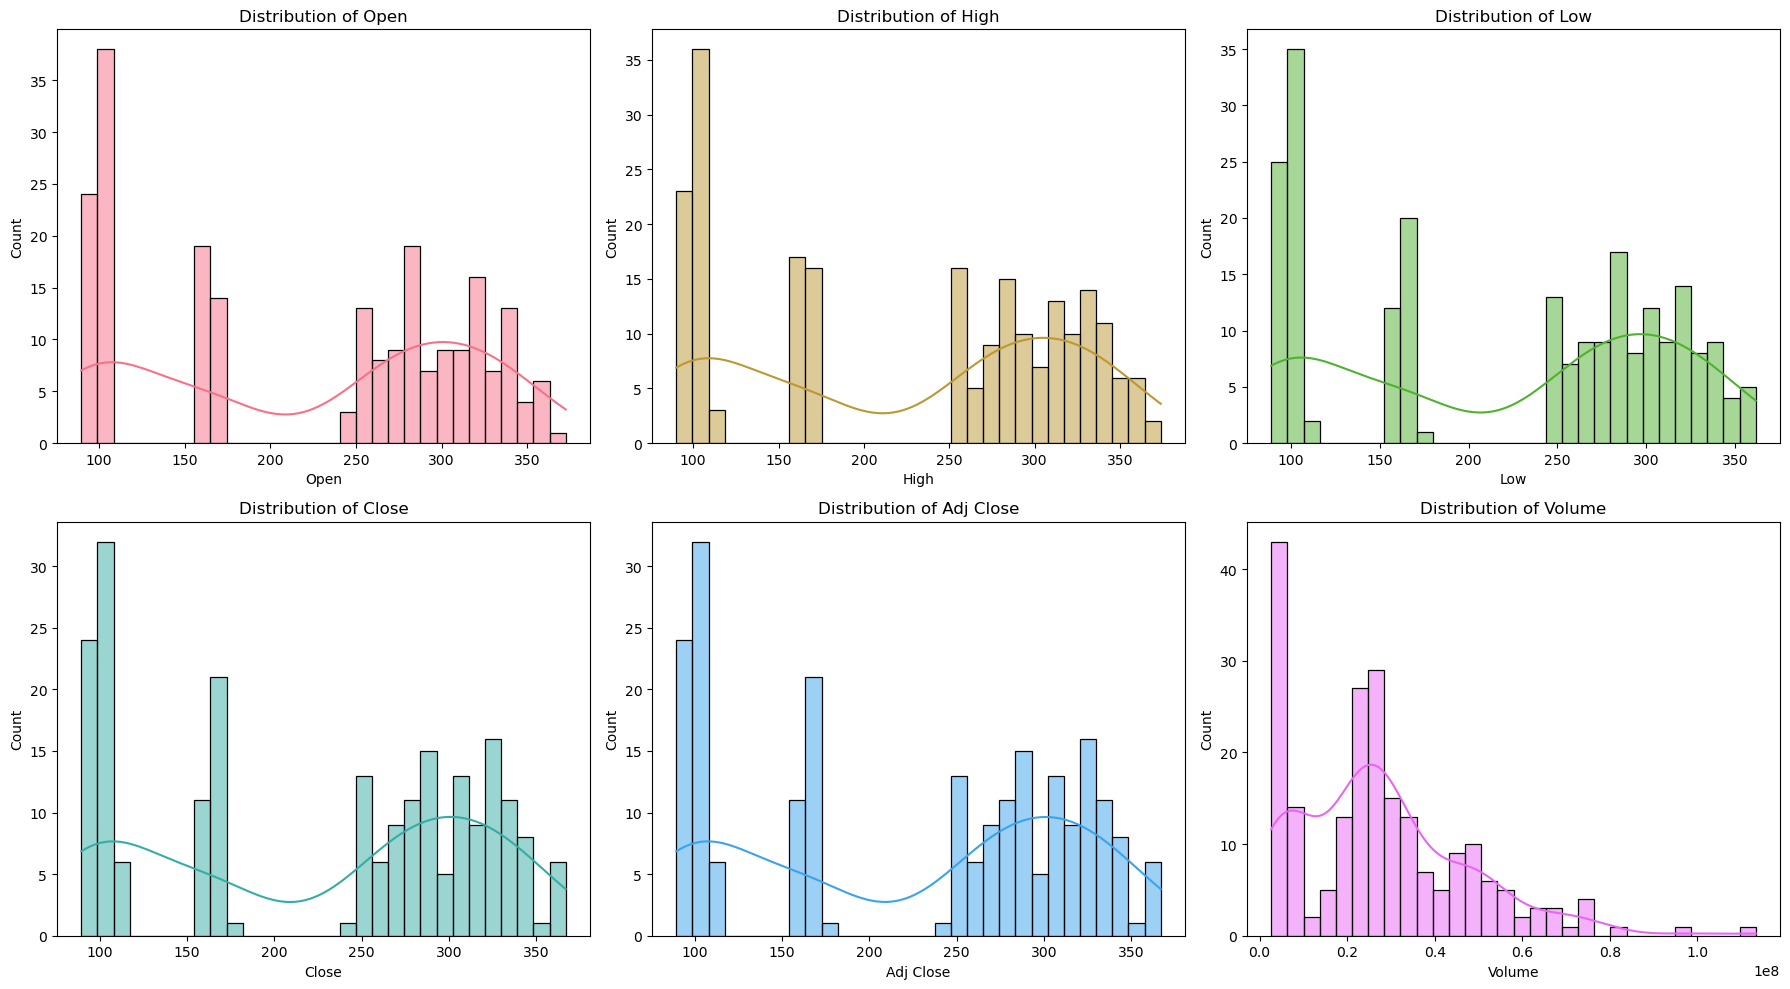

In [19]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
colors = sns.color_palette("husl", len(columns))  # Generate a color palette

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot histograms with KDE for each column with unique colors
for ax, col, color in zip(axes.flat, columns, colors):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color=color)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


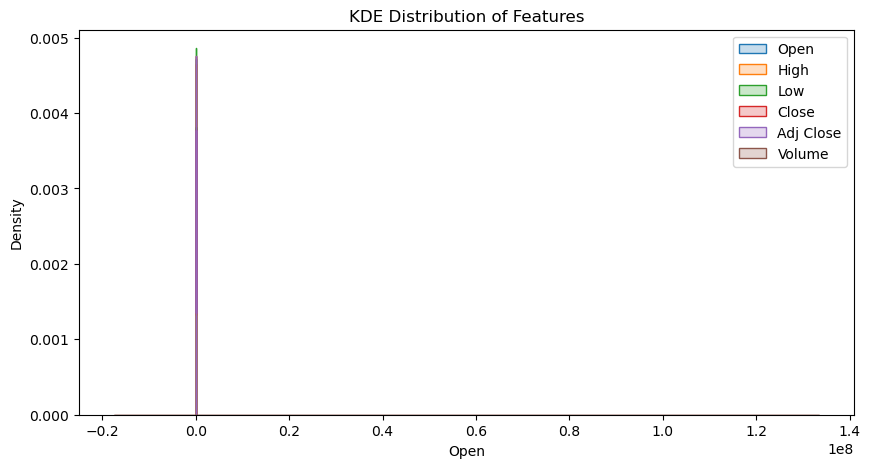

In [20]:
plt.figure(figsize=(10, 5))
for col in columns:
    sns.kdeplot(df[col], label=col, fill=True)
plt.legend()
plt.title("KDE Distribution of Features")
plt.show()

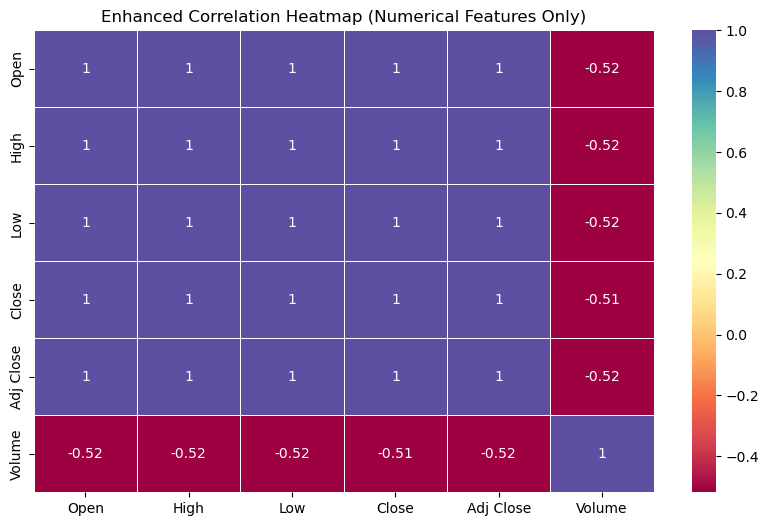

In [21]:
# Compute correlation only for numerical columns
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", linewidths=0.5)  # Change colormap here
plt.title("Enhanced Correlation Heatmap (Numerical Features Only)")
plt.show()

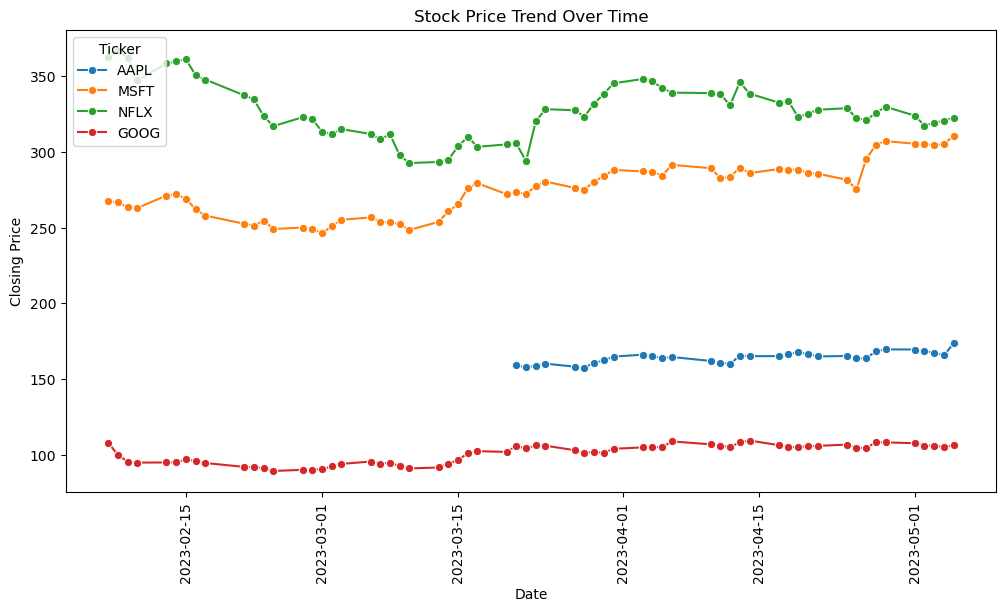

In [22]:
# Plot stock price trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], hue=df["Ticker"], marker="o", linewidth=1.5)
plt.title("Stock Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=90)
plt.legend(title="Ticker", loc="upper left")
plt.show()

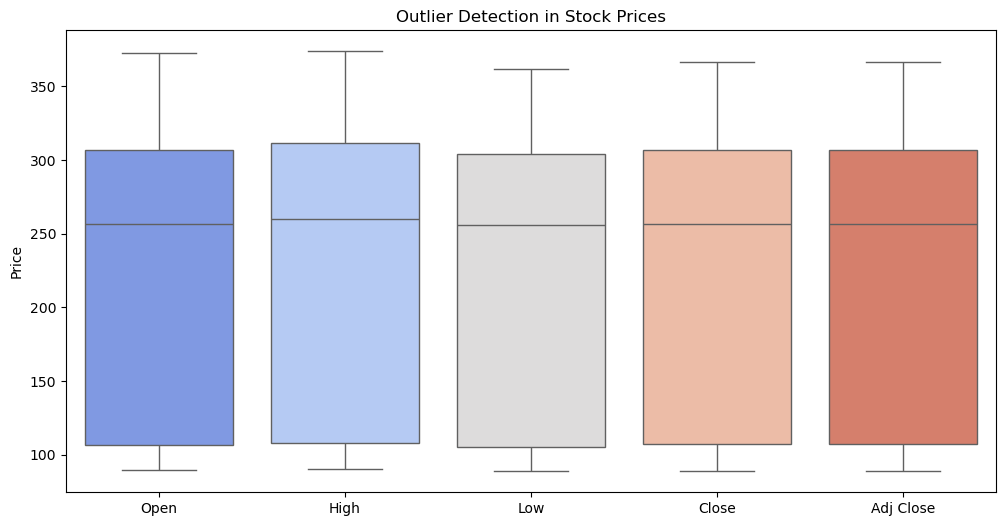

In [60]:
# Boxplot to detect outliers in stock prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close']], palette="coolwarm")  # Changed color palette
plt.title("Outlier Detection in Stock Prices")
plt.ylabel("Price")
plt.show()


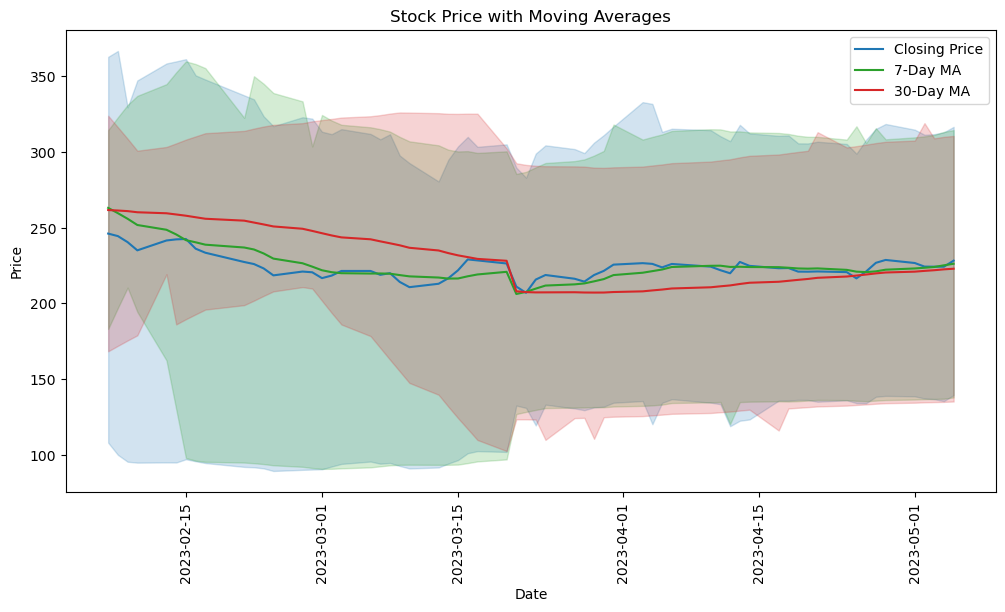

In [62]:
# Plot Moving Averages
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Date"], y=df["Close"], label="Closing Price", color="#1f77b4")  # Dark blue
sns.lineplot(x=df["Date"], y=df["MA_7"], label="7-Day MA", color="#2ca02c")  # Green
sns.lineplot(x=df["Date"], y=df["MA_30"], label="30-Day MA", color="#d62728")  # Dark red
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.legend()
plt.show()


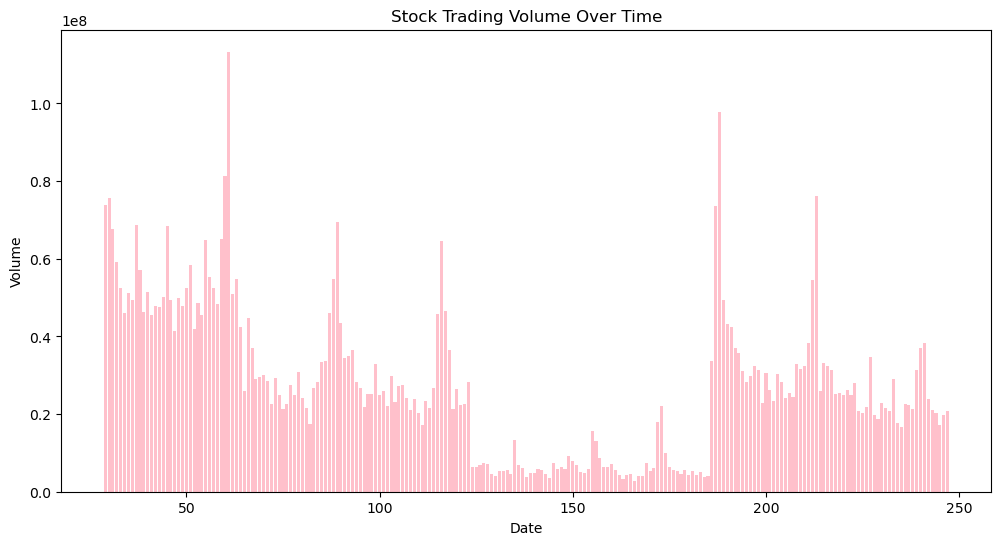

In [25]:
# Visualising the relationship between volume and time
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='pink')
plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

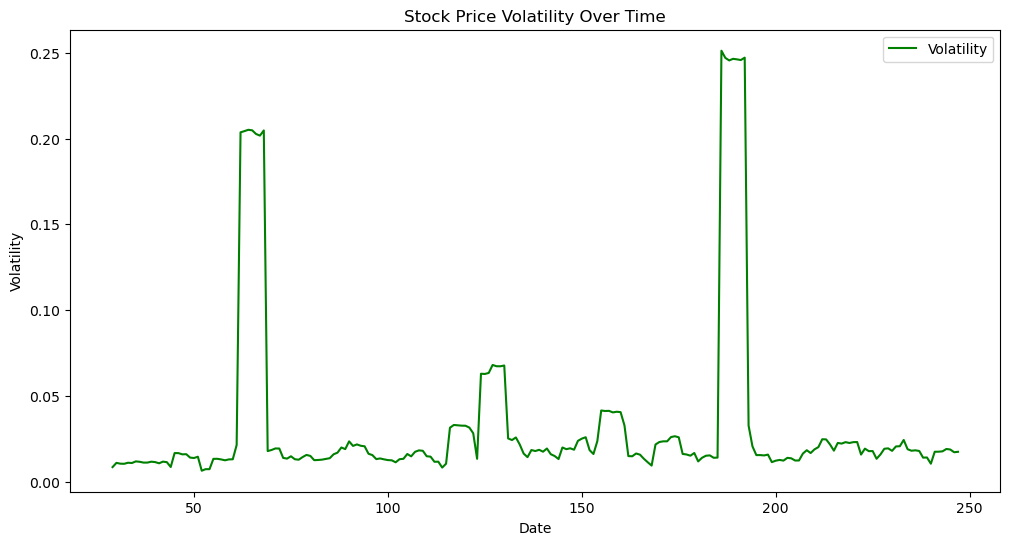

In [26]:
# Visualising the relationship between price volatility and time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='Volatility', color='green')
plt.title("Stock Price Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

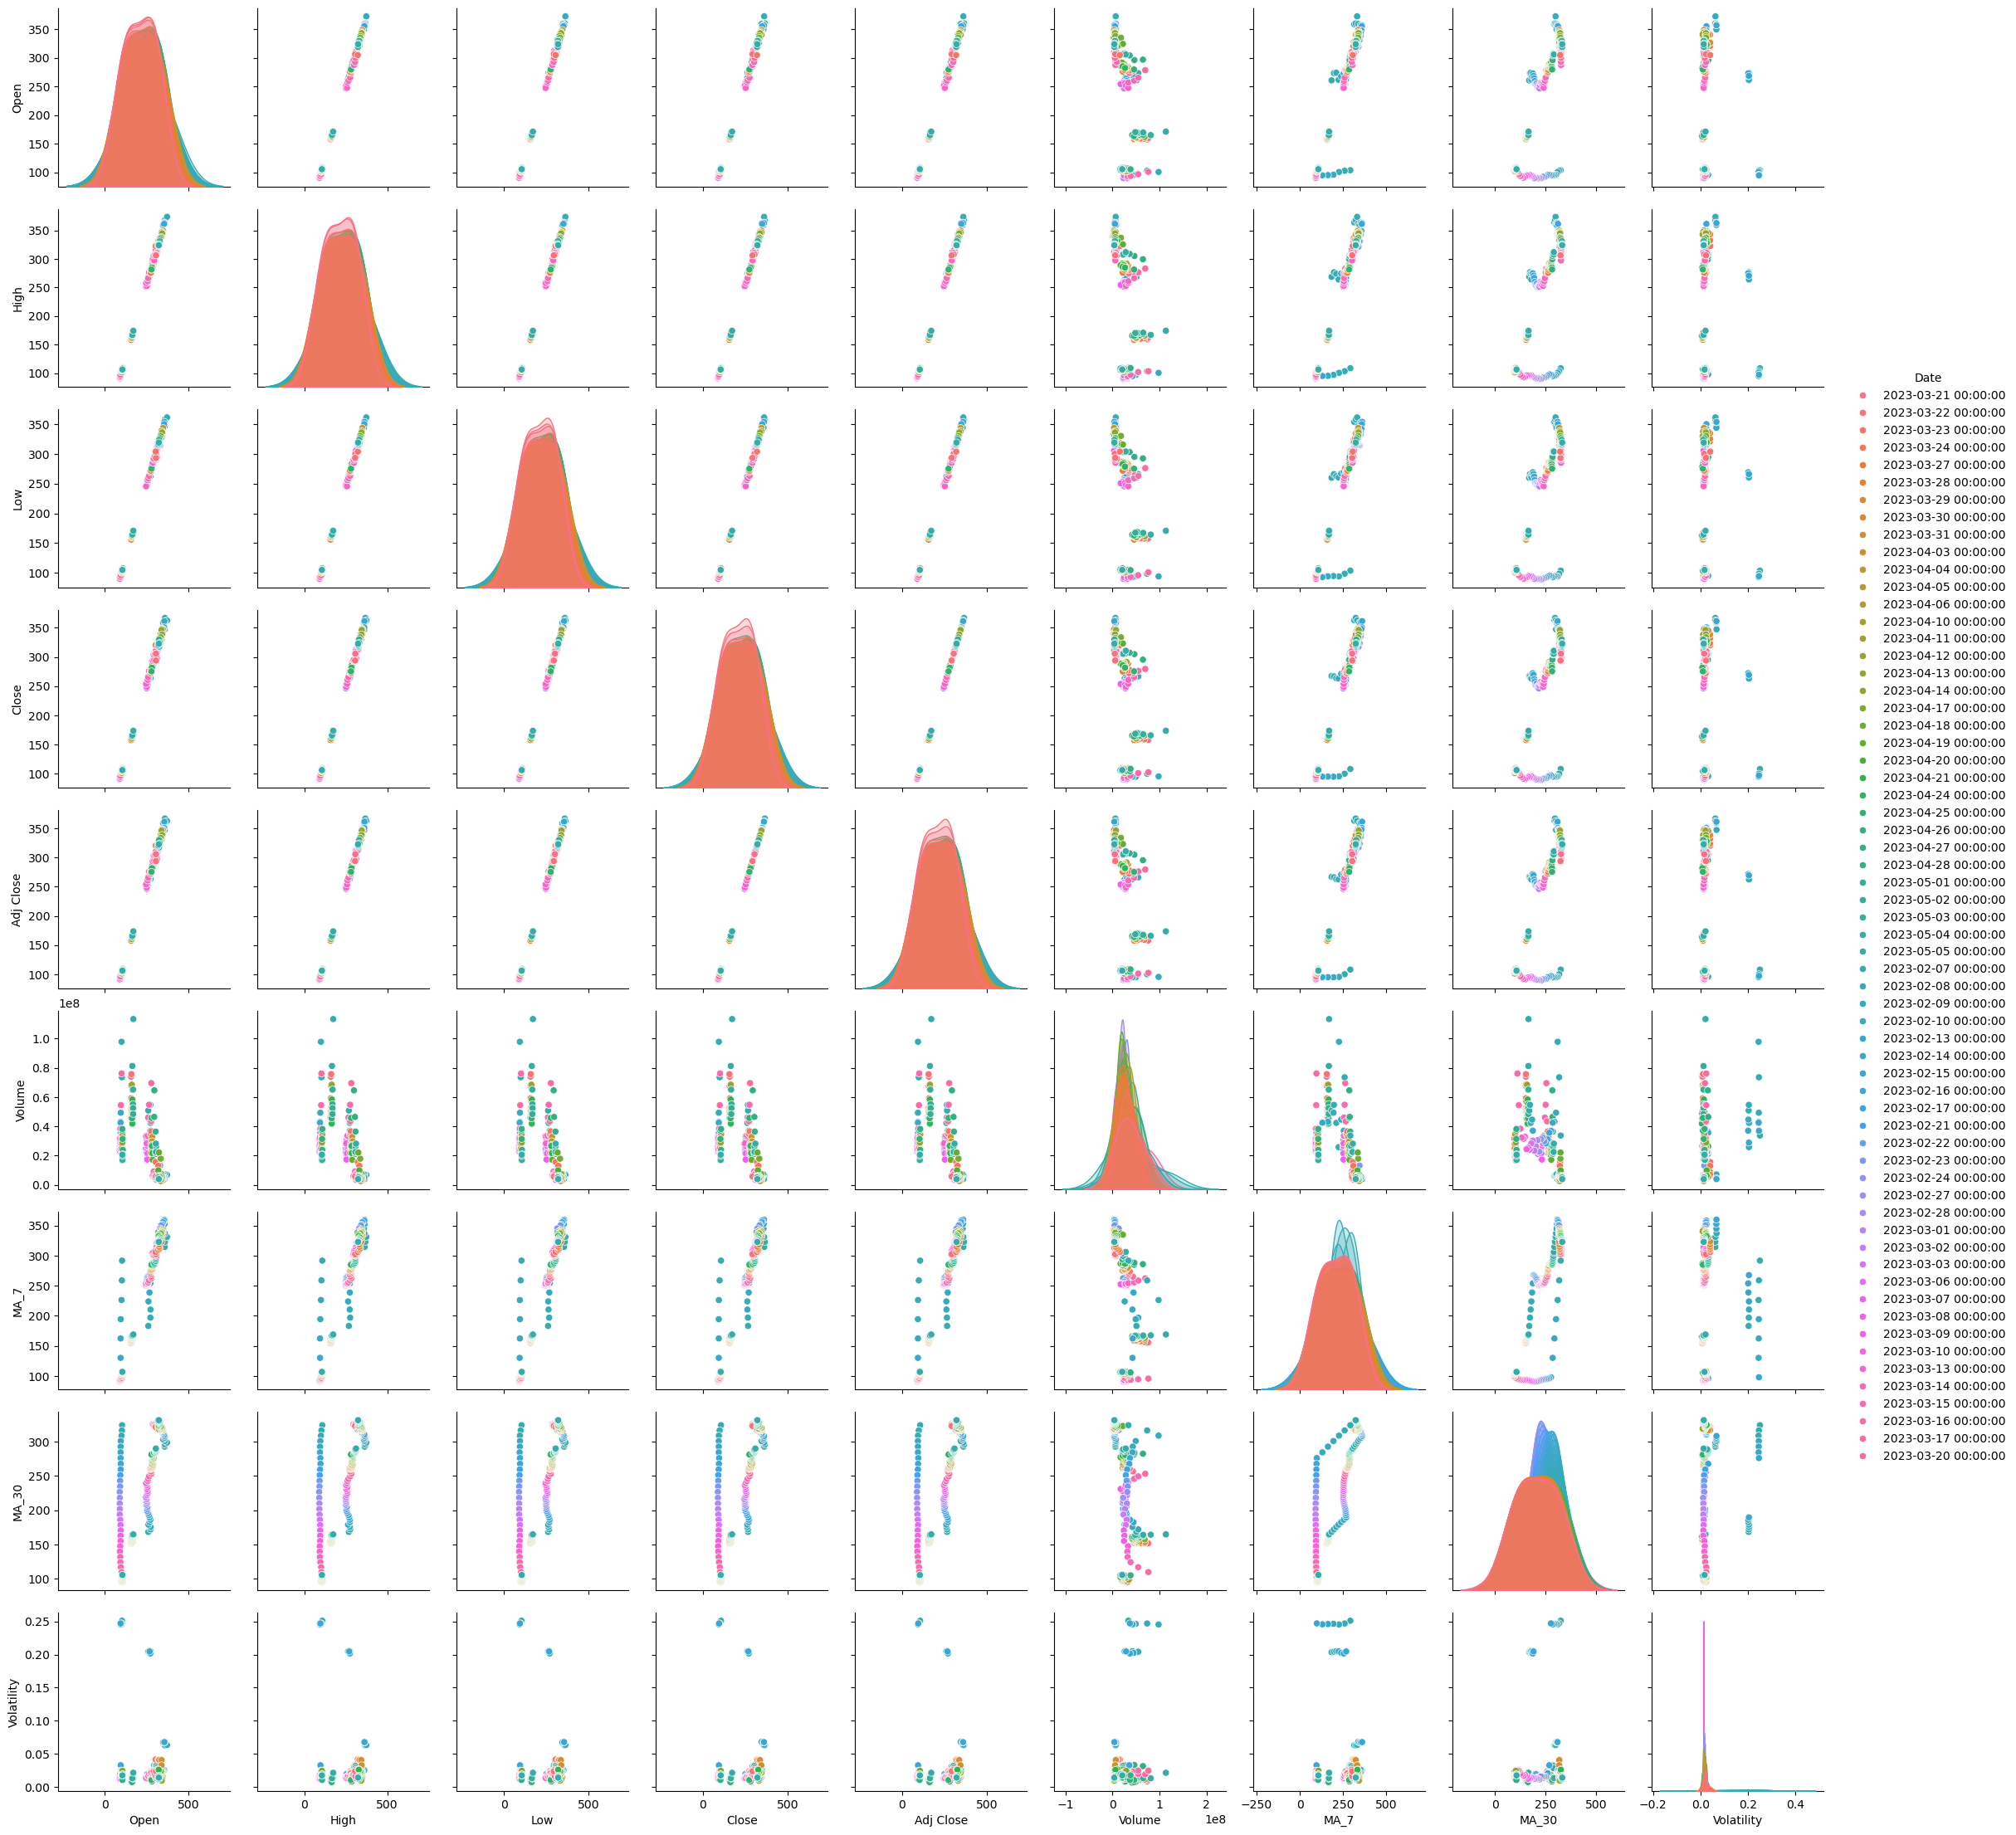

In [27]:
# Visualizing how each column is related to the other columns
sns.pairplot(df, hue="Date", palette="husl")  
plt.show()

RMSE - Random Forest: 18.2328
RMSE - XGBoost: 14.1863


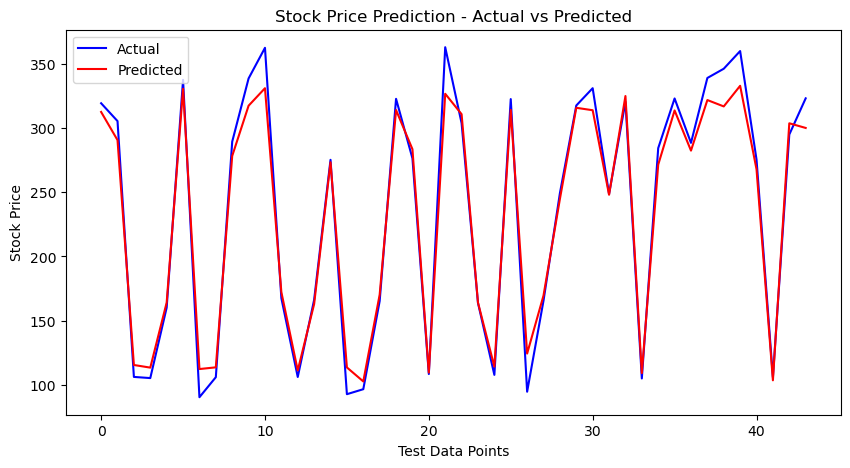

R² Score - Random Forest (Train): 0.9643
R² Score - Random Forest (Test): 0.9654
R² Score - XGBoost (Train): 0.9733
R² Score - XGBoost (Test): 0.9791


In [28]:
# import the libraries that are further going to be used

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Define Features and Target
features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30', 'Volatility']
X = df[features]
y = df['Close']
# 🚀 Apply Min-Max Scaling Before Training
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🚀 Random Forest Model (With Reduced Complexity)
rf_model = RandomForestRegressor(
    n_estimators=30, max_depth=3, min_samples_split=50, min_samples_leaf=20, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

# 🚀 XGBoost Model (With Regularization)
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,  
    learning_rate=0.02,  
    max_depth=3,  
    min_child_weight=10,  
    reg_alpha=10,  
    reg_lambda=10,  
    subsample=0.95,  
    colsample_bytree=0.15  
)
xgb_model.fit(X_train, y_train)
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_test)

# 📂 Save Models & Scaler for Future Prediction
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("xgboost.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

with open("scaler.pkl", "wb") as f:  # Save the scaler for future transformations
    pickle.dump(scaler, f)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Print RMSE Results
print(f'RMSE - Random Forest: {rmse_rf:.4f}')
print(f'RMSE - XGBoost: {rmse_xgb:.4f}')

# 📈 Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_xgb, label='Predicted', color='red')
plt.title('Stock Price Prediction - Actual vs Predicted')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 🏆 Calculate R² Scores
r2_rf_train = r2_score(y_train, y_pred_rf_train)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print R² Scores
print(f'R² Score - Random Forest (Train): {r2_rf_train:.4f}')
print(f'R² Score - Random Forest (Test): {r2_rf:.4f}')
print(f'R² Score - XGBoost (Train): {r2_xgb_train:.4f}')
print(f'R² Score - XGBoost (Test): {r2_xgb:.4f}')


In [29]:
# 📌 Sample Input (Replace with real values)
sample_input = np.array([[159.300003, 162.139999, 157.809998, 75701800, 155.848572, 151.744000, 0.010931]])

# Ensure input is a DataFrame to match model training format
sample_df = pd.DataFrame(sample_input, columns=features)

# 🔄 Apply the SAME SCALING used during training
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

sample_scaled = scaler.transform(sample_df)  # Scale input

# 🎯 Make Predictions
predicted_price_xgb = xgb_model.predict(sample_scaled)[0]
predicted_price_rf = rf_model.predict(sample_scaled)[0]

# 🏆 Print Predictions
print(f"📈 Predicted Stock Price (XGBoost): {predicted_price_xgb:.2f}")
print(f"📉 Predicted Stock Price (Random Forest): {predicted_price_rf:.2f}")


📈 Predicted Stock Price (XGBoost): 161.99
📉 Predicted Stock Price (Random Forest): 137.52


In [30]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_30,Volatility
29,AAPL,2023-03-21,157.320007,159.399994,156.539993,159.279999,159.279999,73938300,154.797143,151.638000,0.008466
30,AAPL,2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800,155.848572,151.744000,0.010931
31,AAPL,2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100,156.754286,151.977667,0.010472
32,AAPL,2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500,157.791428,152.290334,0.010397
33,AAPL,2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300,158.138569,152.532667,0.011014
...,...,...,...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,106.578572,105.476000,0.017653
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,106.588572,105.611000,0.019031
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,106.494287,105.620334,0.018726
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,106.580001,105.653334,0.017137


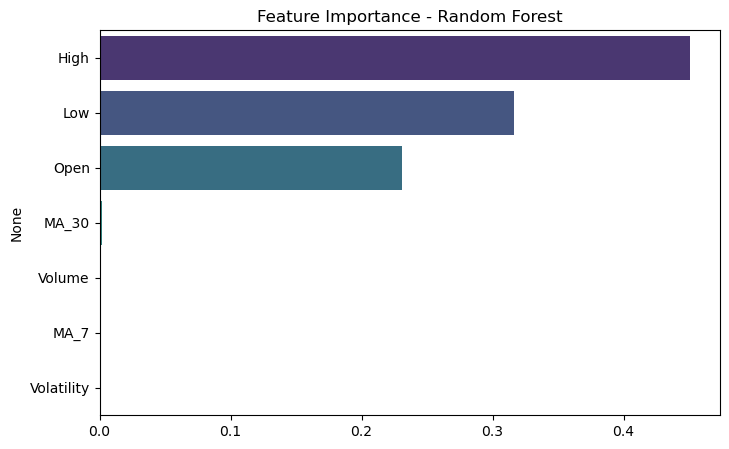

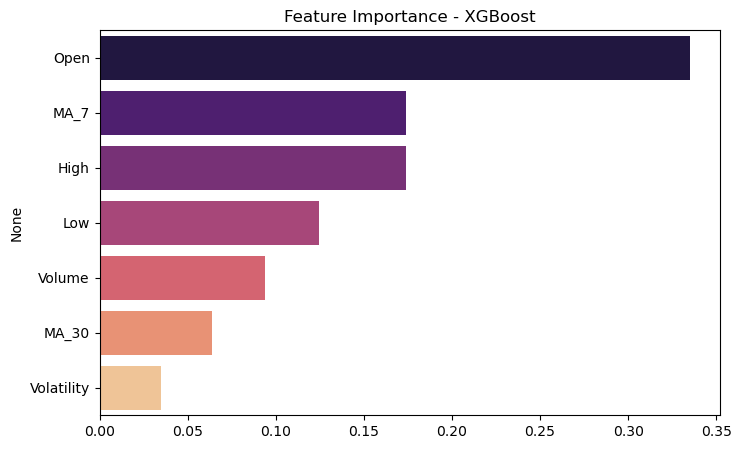

In [31]:
# Feature Importance - Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index, palette="viridis")  # Added color palette
plt.title("Feature Importance - Random Forest")
plt.show()

# Feature Importance - XGBoost
if hasattr(xgb_model, 'feature_importances_'):
    xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index, palette="magma")  # Added color palette
    plt.title("Feature Importance - XGBoost")
    plt.show()
else:
    print("⚠️ XGBoost model has no feature_importances_ attribute! Check if the model trained correctly.")